### Data Collection and Analysis
Dataset collected from kagle
#### PIMA Diabetes Dataset

In [1]:
import pandas as pd
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [2]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [4]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Define the features to be scaled
features_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Fit the scaler to the data and transform the features
scaled_features = scaler.fit_transform(diabetes_dataset[features_to_scale])

# Update the original DataFrame with the scaled features
diabetes_dataset[features_to_scale] = scaled_features

print(diabetes_dataset.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In [6]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,-0.162456,-0.341594,-0.047638,-0.054728,-0.095577,-0.214288,-0.127275,-0.174505
1,0.303090,0.637302,0.088877,0.102104,0.178315,0.399790,0.237453,0.325569


In [8]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size = 0.2, stratify=Y, random_state=2)

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### Evaluation

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluation(model):
    training_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    
    print("Accuracy Score of the model: ")
    
    training_data_accuracy = accuracy_score(Y_train, training_prediction)
    print("Accuracy score on training data: ", training_data_accuracy)

    test_data_accuracy = accuracy_score(Y_test, test_prediction)
    print("Accuracy score on test data: ", test_data_accuracy)
    
    print()
    print("Precision of the model: ")

    training_data_precision = precision_score(Y_train, training_prediction, average='binary')
    print("Precision score on training data: ", training_data_precision)

    test_data_precision = precision_score(Y_test, test_prediction, average='binary')
    print ("Precision score on test data: ", test_data_precision)
    print()
    print("Recall of the model: ")

    training_data_recall = recall_score(Y_train, training_prediction, average='binary')
    print("Recall score on training data: ", training_data_recall)

    test_data_recall = recall_score(Y_test, test_prediction, average='binary')
    print ("Recall score on test data: ", test_data_recall)
    print()
    print("f1 score of the model: ")

    training_data_f1 = f1_score(Y_train, training_prediction, average='binary')
    print("f1 score on training data: ", training_data_f1)

    test_data_f1 = f1_score(Y_test, test_prediction, average='binary')
    print ("f1 score on test data: ", test_data_f1)
    
    conf_matrix_train = confusion_matrix(Y_train, training_prediction)

    sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix for Training Data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    conf_matrix_test = confusion_matrix(Y_test, test_prediction)

    sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix for Test Data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [13]:
from pycaret.classification import compare_models, setup

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target.

In [14]:
clf1 = setup(data = diabetes_dataset, 
             target = 'Outcome')

,Description,Value
0,Session id,8624
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [15]:
top5 = compare_models(sort='AUC',
                      n_select=5,
                      exclude=['lightgbm', 'xgboost', 'dummy', 'svm', 'ridge', 'knn', 'dt', 'nb', 'qda']
                     )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7801,0.8397,0.5933,0.7236,0.6490,0.4922,0.4992,0.1850
lda,Linear Discriminant Analysis,0.7763,0.8378,0.5825,0.7240,0.6416,0.4828,0.4914,0.0040
gbc,Gradient Boosting Classifier,0.7599,0.8216,0.6161,0.6677,0.6387,0.4599,0.4626,0.0210
rf,Random Forest Classifier,0.7632,0.8179,0.5722,0.6982,0.6224,0.4545,0.4635,0.0280
et,Extra Trees Classifier,0.7540,0.8116,0.5611,0.6779,0.6102,0.4340,0.4405,0.0240
ada,Ada Boost Classifier,0.7318,0.8019,0.5509,0.6283,0.5839,0.3888,0.3921,0.0120


### Soft Voting Ensemble

A soft voting ensemble is a type of ensemble learning method used in machine learning for classification tasks where multiple base models are trained on the same dataset, and they each produce probability estimates for all possible classes.

To make predictions with a soft voting ensemble, the predicted probabilities from each base model are averaged (or weighted averaged) for each class across all base models. The class with the highest average probability is then chosen as the final prediction.

In [16]:
from pycaret.classification import blend_models

In [17]:
blend_soft = blend_models(estimator_list = top5, optimize = 'AUC',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.9023,0.5789,0.8462,0.6875,0.5624,0.5828
1,0.8333,0.9278,0.7368,0.7778,0.7568,0.6301,0.6307
2,0.7037,0.8271,0.4211,0.6154,0.5000,0.2998,0.3107
3,0.7778,0.7970,0.5789,0.7333,0.6471,0.4882,0.4954
4,0.8148,0.8677,0.6842,0.7647,0.7222,0.5840,0.5860
5,0.7222,0.7895,0.5263,0.6250,0.5714,0.3682,0.3711
6,0.7593,0.8075,0.5263,0.7143,0.6061,0.4384,0.4490
7,0.8302,0.8857,0.7778,0.7368,0.7568,0.6265,0.6270
8,0.7358,0.8206,0.6111,0.6111,0.6111,0.4111,0.4111


Evaluation scores of Soft Voting: 

Accuracy Score of the model: 
Accuracy score on training data:  0.9022801302931596
Accuracy score on test data:  0.9155844155844156

Precision of the model: 
Precision score on training data:  0.8928571428571429
Precision score on test data:  0.9361702127659575

Recall of the model: 
Recall score on training data:  0.8177570093457944
Recall score on test data:  0.8148148148148148

f1 score of the model: 
f1 score on training data:  0.8536585365853658
f1 score on test data:  0.8712871287128713


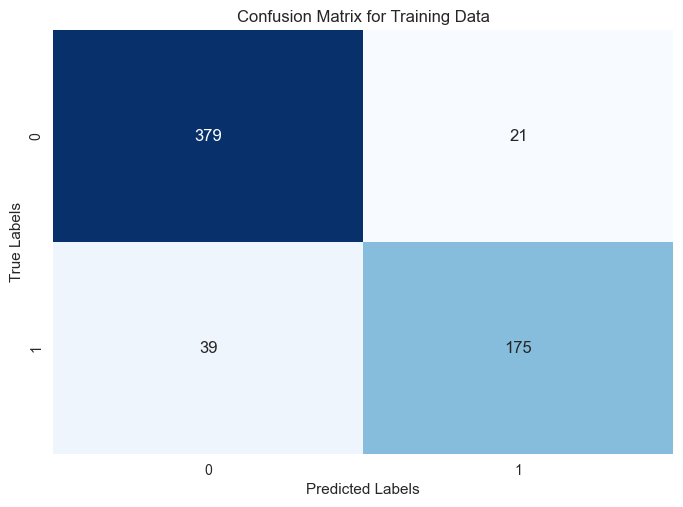

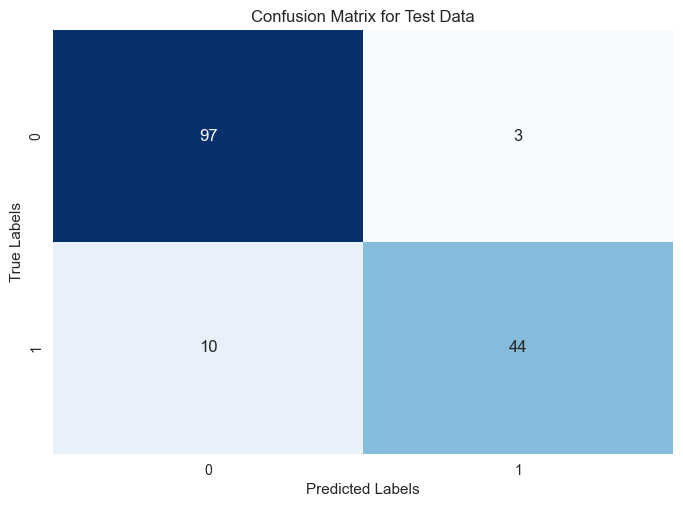

In [18]:
print("Evaluation scores of Soft Voting: ")
print()
evaluation(blend_soft)

### Calibrating the Model

Calibrating a model is the process of adjusting the predicted probabilities output by a model to better reflect the true probabilities of the outcomes.

When a classification model generates probabilities for each class, these probabilities ideally represent the model's confidence in its predictions. However, these predicted probabilities may not always be well-calibrated, meaning they may not accurately reflect the true likelihood of the corresponding outcomes.

Calibration ensures that the probabilities are reliable and can be interpreted meaningfully.

In [19]:
from pycaret.classification import calibrate_model

In [20]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8519,0.9113,0.6842,0.8667,0.7647,0.6588,0.6686
1,0.8333,0.9233,0.7368,0.7778,0.7568,0.6301,0.6307
2,0.6852,0.8301,0.3684,0.5833,0.4516,0.2463,0.2591
3,0.7778,0.7940,0.5789,0.7333,0.6471,0.4882,0.4954
4,0.8148,0.8692,0.6842,0.7647,0.7222,0.5840,0.5860
5,0.7037,0.7925,0.4737,0.6000,0.5294,0.3175,0.3223
6,0.7593,0.8195,0.5263,0.7143,0.6061,0.4384,0.4490
7,0.8491,0.8857,0.7778,0.7778,0.7778,0.6635,0.6635
8,0.8113,0.8238,0.7222,0.7222,0.7222,0.5794,0.5794


### Finalizing the Model

In [21]:
from pycaret.classification import finalize_model

In [22]:
final_model = finalize_model(cali_model)

Final Evaluation scores of the model: 

Accuracy Score of the model: 
Accuracy score on training data:  0.9348534201954397
Accuracy score on test data:  0.922077922077922

Precision of the model: 
Precision score on training data:  0.9484536082474226
Precision score on test data:  0.9772727272727273

Recall of the model: 
Recall score on training data:  0.8598130841121495
Recall score on test data:  0.7962962962962963

f1 score of the model: 
f1 score on training data:  0.9019607843137255
f1 score on test data:  0.8775510204081632


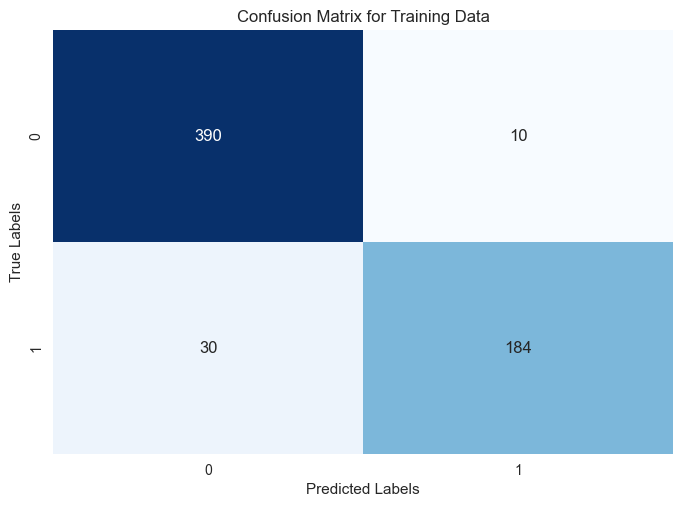

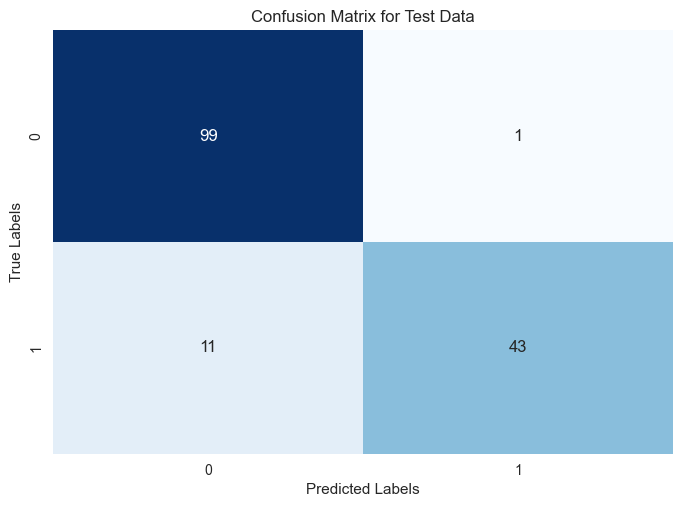

In [23]:
print("Final Evaluation scores of the model: ")
print()
evaluation(final_model)

### Saving the trained model

In [24]:
import pickle

In [25]:
filename = 'diabetes_model_new.sav'
pickle.dump(final_model, open(filename, 'wb'))